## Importing modules

In [26]:
import pandas as pd
from warnings import warn
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import Imputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble  import RandomForestClassifier

# Pipelines, feature & text preprocessing

Pipelines are a repeatable way to go from raw data to trained model. The pipeline object takes sequential list of steps where the output of one step is input to next step. Each step is a tuple with two elements: 
* Name: a string naming the step
* An object that implements the .fit() and .transform() methods

Pipeline are a flexible way too represent workflow: a step can itself be another pipeline! A pipeline encapsulates every transformation from raw data to a trained model. 

In this code, the pipeline has only one step (you would never use a pipeline with one step, as what would be the point) and is to familiarise us with the syntax. The step is called clf for classifer. The step is the OneVsRest LogisticRegression classifier we used earlier. 

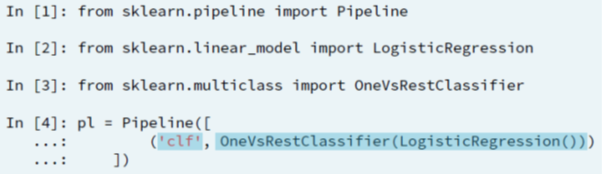

We will use a train_test_split method where the X is the numeric column, and the y is the dummy encoding of the label column. We then call the fit method on the classifer. 

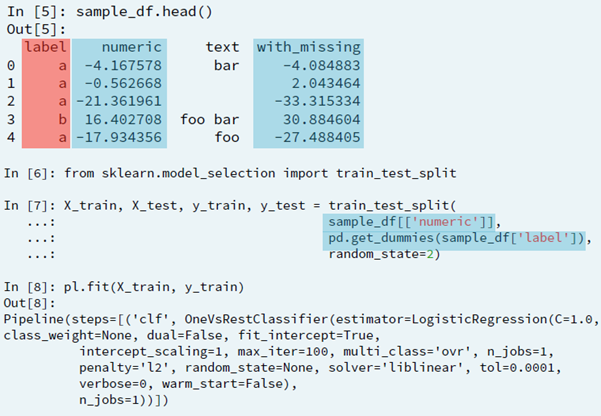

The default scoring method for this classifier is accuracy

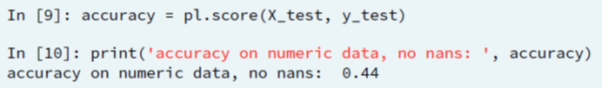

If we try to add the ‘with missing’ column to our X values, we get an error as there are NaN values in the column.

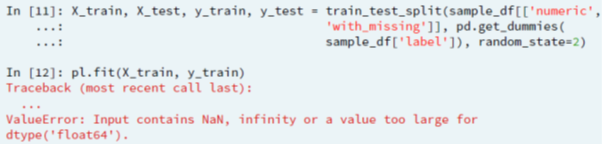

To fix this we need to add an imputer to our data which will fill in the NaN values. TO do this, we add a step to the pipeline with the name ‘imp’ and an imputer object. The default of the imputer is to fill missing values with the mean of the column, though other strategies are possible (see documentation). Now we fit our model including the ‘with missing’ column and score it.

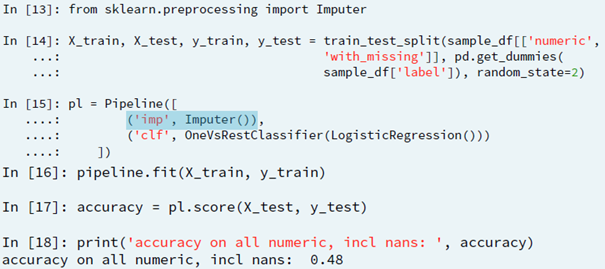

## Instantiate pipeline

In order to make your life easier as you start to work with all of the data in your original DataFrame, <span style="color:blue">df</span>, it's time to turn to one of scikit-learn's most useful objects: the <span style="color:blue">Pipeline</span>.

For the next few exercises, you'll reacquaint yourself with pipelines and train a classifier on some synthetic (sample) data of multiple datatypes before using the same techniques on the main dataset.

The sample data is stored in the DataFrame, <span style="color:blue">sample_df</span>, which has three kinds of feature data: numeric, text, and numeric with missing values. It also has a label column with two classes, <span style="color:blue">a</span> and <span style="color:blue">b</span>.

In this exercise, your job is to instantiate a pipeline that trains using the <span style="color:blue">numeric</span> column of the sample data.

* [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [5]:
import pandas as pd
sample_df = pd.read_csv('sample_data.csv', index_col=0)

In [6]:
# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']],pd.get_dummies(sample_df['label']),random_state=22)

# Instantiate Pipeline object: pl
pl = Pipeline([('clf', OneVsRestClassifier(LogisticRegression()))])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)


Accuracy on sample data - numeric, no nans:  0.62


Perfect. Now it's time to incorperate numeric data with missing values by adding a preprocessing step!

## Preprocessing numeric features

What would have happened if you had included the with <span style="color:blue">'with_missing'</span> column in the last exercise? Without imputing missing values, the pipeline would not be happy (try it and see). So, in this exercise you'll improve your pipeline a bit by using the <span style="color:blue">Imputer()</span> imputation transformer from scikit-learn to fill in missing values in your sample data.

By default, the imputer transformer replaces NaNs with the mean value of the column. That's a good enough imputation strategy for the sample data, so you won't need to pass anything extra to the imputer.

After importing the transformer, you will edit the steps list used in the previous exercise by inserting a <span style="color:blue">(name, transform)</span> tuple. Recall that steps are processed sequentially, so make sure the new tuple encoding your preprocessing step is put in the right place.

The <span style="color:blue">sample_df</span> is in the workspace, in case you'd like to take another look. Make sure to select both numeric columns- in the previous exercise we couldn't use <span style="color:blue">with_missing</span> because we had no preprocessing step!

* [Imputer()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html)

In [7]:
# Import the Imputer object
from sklearn.preprocessing import Imputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']],pd.get_dummies(sample_df['label']),random_state=456)

# Insantiate Pipeline object: pl
pl = Pipeline([
        ('imp', Imputer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)


Accuracy on sample data - all numeric, incl nans:  0.636


# Text features and feature unions
The sample dataframe contains a column we haven’t yet used: the text column. To familiarize ourselves with how to use this, we change our train and test data to just work with the text data.  We then add a step to the pipeline with the name ‘vec’, which is the countvectorizer (an sklearn function that converts a collection of text documents to a matrix of token counts). The result od the countvectorizer will be passed into the classifier. We can then call the fit and score methods as previously. The score now reports the accuracy if we just used the text data.

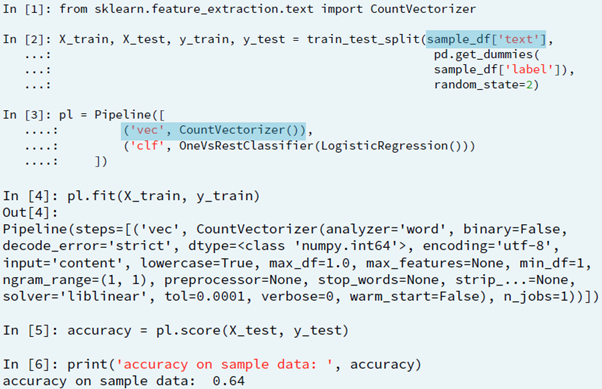

If we want to use all the data, say by including countvectorizer and imputer in the pipeline before feeding them into the classifer, we have a problem: the countvectorizier won’t know what to do with the number columns and we don’t want to impute on the text columns. We have to do these operations separately. There are two tools for this: FunctionTransfomer() and FeatureUnion(). 

Function transformer takes a python function and turns it into an object that the scikit learn pipeline can understand. We need to perform two functions for pipeline preprocessing:
* Take entire DataFrame, return numeric columns
* Take entire DataFrame, return text columns

We can then preprocess text and numeric data in separate pipelines. 

First we do the train_test_split on the entire dataset then import the two utilities we need for these jobs.
Next, we write two functions. One that takes the whole dataframe and just returns the clumn called ‘text’ and one that takes the whole dataframe and returns the columns called ‘numeric’ and ‘with_missing’. The ‘validate=false’ tells scikit learn that it does not need to check for nans or validate the dtypes of the input. 

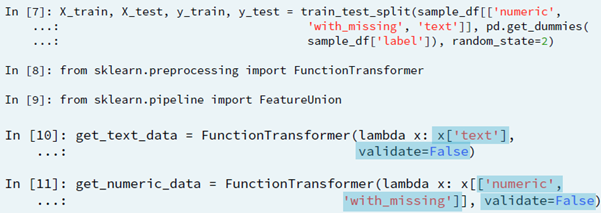

The text pipeline generates the array on the left, the text features, whereas the numeric pipeline generates the array on the right, the numeric features.

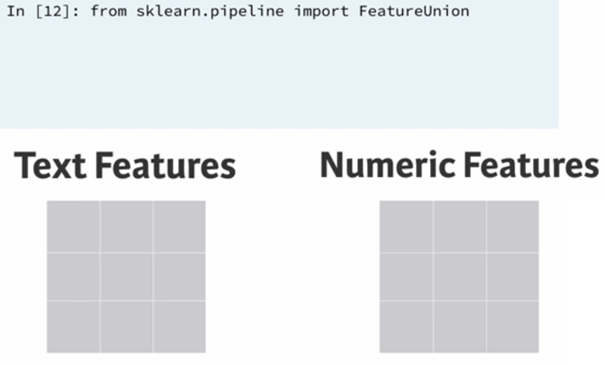

The FeatureUnion object joins them together into a single array that will be the input to the classifier.  

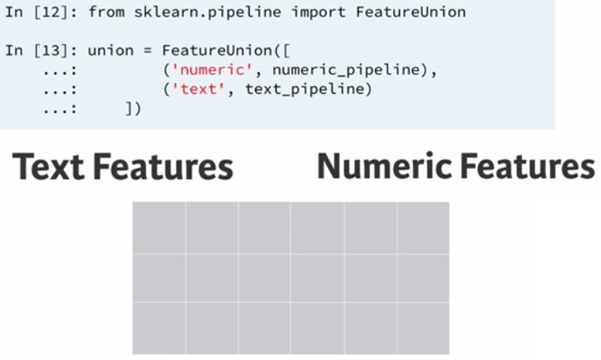

So to put all this together, we create out numeric pipeline, the steps of which are to get the numeric data and to impute on it, and our text pipeline, the steps of which are to get the text data and run countvectorizer on it. Then we create a pipeline object, the first step of which is to FeatureUnion our two pipelines into one to create an object that feeds into the classifier, which is the second step. 

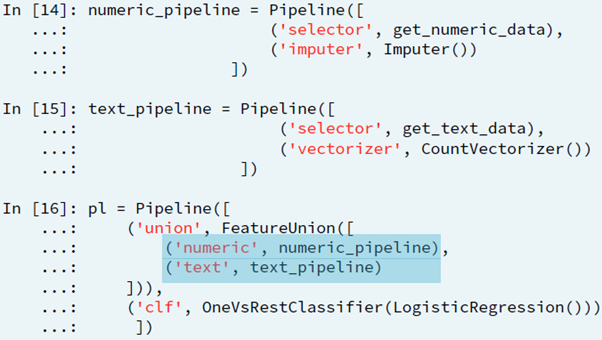

## Preprocessing text features

Here, you'll perform a similar preprocessing pipeline step, only this time you'll use the <span style="color:blue">text</span> column from the sample data.

To preprocess the text, you'll turn to <span style="color:blue">CountVectorizer()</span> to generate a bag-of-words representation of the data, as in Chapter 2. Using the default arguments, add a <span style="color:blue">(step, transform)</span> tuple to the steps list in your pipeline.

Make sure you select only the text column for splitting your training and test sets.

In [10]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(sample_df['text'],pd.get_dummies(sample_df['label']),random_state=456)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)


Accuracy on sample data - just text data:  0.808


Flawless! Looks like you're ready to create a pipeline for processing multiple datatypes!

## Multiple types of processing: FunctionTransformer

The next two exercises will introduce new topics you'll need to make your pipeline truly excel.

Any step in the pipeline must be an object that implements the <span style="color:blue">fit</span> and <span style="color:blue">transform</span> methods. The FunctionTransformer creates an object with these methods out of any Python function that you pass to it. We'll use it to help select subsets of data in a way that plays nicely with pipelines.

You are working with numeric data that needs imputation, and text data that needs to be converted into a bag-of-words. You'll create functions that separate the text from the numeric variables and see how the <span style="color:blue">.fit()</span> and <span style="color:blue">.transform()</span> methods work.

* [FunctionTransformer()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html)
* [FunctionTransformer.fit_transform()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer.fit_transform)

In [9]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
0           ''
1        'foo'
2    'foo bar'
3           ''
4    'foo bar'
Name: text, dtype: object

Numeric Data
     numeric  with_missing
0 -10.856306      4.433240
1   9.973454      4.310229
2   2.829785      2.469828
3 -15.062947      2.852981
4  -5.786003      1.826475


## Multiple types of processing: FeatureUnion

Now that you can separate text and numeric data in your pipeline, you're ready to perform separate steps on each by nesting pipelines and using <span style="color:blue">FeatureUnion()</span>.

These tools will allow you to streamline all preprocessing steps for your model, even when multiple datatypes are involved. Here, for example, you don't want to impute our text data, and you don't want to create a bag-of-words with our numeric data. Instead, you want to deal with these separately and then join the results together using <span style="color:blue">FeatureUnion()</span>.

In the end, you'll still have only two high-level steps in your pipeline: preprocessing and model instantiation. The difference is that the first preprocessing step actually consists of a pipeline for numeric data and a pipeline for text data. The results of those pipelines are joined using <span style="color:blue">FeatureUnion()</span>.

* [FeatureUnion()](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html)

In [11]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])


# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)


Accuracy on sample data - all data:  0.928


Crushed it! You now know more about pipelines than many practicing data scientists. You're on fire!

## Choosing a classification model
In our sample dataset of the previous exercises, we only had one text column, and this is what pipeline expects. But in the school budget dataset, there are 14 text columns. We previously wrote a dfunction that converted multiple text columns into a single combined text column. We will use this on our school budget dataset to return a single text column. 

We use get_dummies to create our label array and use train_test_split with the multilabel train_test_split function 

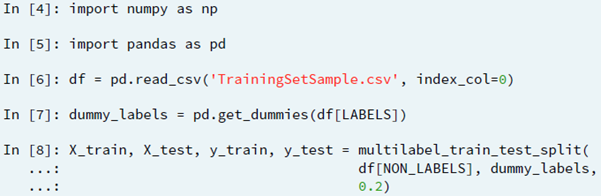


Now we use the code we used before on the sample dataset with one change: we use combine_text_columns as the first input to the get_text_data FunctionTransformer (instead of the lambda function that simply extracted the single text column). The rest remains the same, which, as a refresher, was:

* Pipeline processes text and imputes numeric columns
* Joins these results together
* Fits a multilabel logistic regression

When we have this model, we can then experiment with trying to improve it. Try different classes of models – e.g. keep all code steps the same but change last step to be a different model than logistic regression, such as random forest, naïve bayes, k-NN

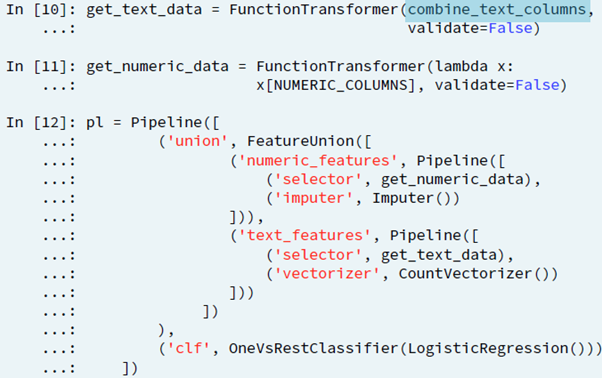

## Using FunctionTransformer on the main dataset

In this exercise you're going to use <span style="color:blue">FunctionTransformer</span> on the primary budget data, before instantiating a multiple-datatype pipeline in the next exercise.

Recall from Chapter 2 that you used a custom function <span style="color:blue">combine_text_columns</span> to select and properly format text data for tokenization; it is loaded into the workspace and ready to be put to work in a function transformer!

Concerning the __numeric data__, you can use <span style="color:blue">NUMERIC_COLUMNS</span>, preloaded as usual, to help design a subset-selecting lambda function.

You're all finished with sample data. The original df is back in the workspace, ready to use.

* [pd.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [16]:
# load the dataframe and define the columns of interest
import pandas as pd
df = pd.read_csv('ch3_df.csv', index_col=0)

NUMERIC_COLUMNS = ['FTE', 'Total']
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']

In [17]:
# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna('', inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

In [19]:
from warnings import warn

import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).all():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

In [22]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123,
                                                              min_count=1)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

At this point we're not even surprised - you rule! Now go forth and build a full pipeline!

## Add a model to the pipeline

You're about to take everything you've learned so far and implement it in a <span style="color:blue">Pipeline</span> that works with the real, [DrivenData](https://www.drivendata.org/) budget line item data you've been exploring.

Surprise! The structure of the pipeline is exactly the same as earlier in this chapter:

* The __preprocessing step__ uses <span style="color:blue">FeatureUnion</span> to join the results of nested pipelines that each rely on <span style="color:blue">FunctionTransformer</span> to select multiple datatypes
* The __model step__ stores the model object

You can then call familiar methods like <span style="color:blue">.fit()</span> and <span style="color:blue">.score()</span> on the <span style="color:blue">Pipeline</span> object <span style="color:blue">pl</span>.

In [25]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

C:\Users\leero\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 37 is present in all training examples.
  str(classes[c]))
C:\Users\leero\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 46 is present in all training examples.
  str(classes[c]))
C:\Users\leero\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 52 is present in all training examples.
  str(classes[c]))
C:\Users\leero\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 56 is present in all training examples.
  str(classes[c]))
C:\Users\leero\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 66 is present in all training examples.
  str(classes[c]))
C:\Users\leero\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 92 is present in all training examples.
  str(classes[c]))
C:\Users\leero\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 10


Accuracy on budget dataset:  0.165


## Try a different class of model

Now you're cruising. One of the great strengths of pipelines is how easy they make the process of testing different models.

Until now, you've been using the model step <span style="color:blue">('clf', OneVsRestClassifier(LogisticRegression()))</span> in your pipeline.

But what if you want to try a different model? Do you need to build an entirely new pipeline? New nests? New FeatureUnions? Nope! You just have a simple one-line change, as you'll see in this exercise.

In particular, you'll swap out the logistic-regression model and replace it with a [random forest](https://en.wikipedia.org/wiki/Random_forest) classifier, which uses the statistics of an ensemble of decision trees to generate predictions.

* [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [scikitlearn.ensemble](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)

In [24]:
# Import random forest classifer
from sklearn.ensemble  import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier())
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.275


Wow, you're becoming a master! It's time to get serious and work with the log loss metric. You'll learn expert techniques in the next chapter to take the model to the next level.

## Appendix: Methods

* [Imputer()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html)
* [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* [FunctionTransformer()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html)
* [FunctionTransformer.fit_transform()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer.fit_transform)
* [FeatureUnion()](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html)
* [pd.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
* [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [scikitlearn.ensemble](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
